In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


In [4]:
!unzip /content/archive8.zip

Archive:  /content/archive8.zip
  inflating: dermatology_database_1.csv  


In [5]:
import pandas as pd
data = pd.read_csv("/content/dermatology_database_1.csv")
print(data)

     erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0         

In [6]:

data.head()


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


Q1. From the above data split the data into train and test and train SVM, RF find the result?

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
# Replace '?' with NaN
data = data.replace('?', np.nan)

# Convert all columns to numeric, errors='coerce' will force non-numeric values to NaN
# Make sure to adjust the column names based on the actual columns in your dataset that may have '?'
# For example, If you suspect 'column1' and 'column2' to have '?', then:
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Impute missing values - replace NaN with the mean of the column
# You can also explore other imputation methods like median, knn etc.
data = data.fillna(data.mean())
# Split features (X) and target (y)
X = data.drop("class", axis=1)
y = data["class"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# Train SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
print("SVM Results:")
print(classification_report(y_test, svm_preds))
print("Accuracy:", accuracy_score(y_test, svm_preds))

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("\nRandom Forest Results:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))


SVM Results:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74

Accuracy: 0.9864864864864865

Random Forest Results:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accurac

Q2. Find the outliers, remove the outliers and again train SVM, RF find the results.

In [11]:
# Outlier detection using Z-score
from scipy.stats import zscore

z_scores = np.abs(zscore(X))
threshold = 3  # Typically, a Z-score greater than 3 is considered an outlier
non_outliers = (z_scores < threshold).all(axis=1)

# Remove outliers
X_no_outliers = X[non_outliers]
y_no_outliers = y[non_outliers]

# Standardize again after removing outliers
X_no_outliers_scaled = scaler.fit_transform(X_no_outliers)

# Train-test split without outliers
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers_scaled, y_no_outliers, test_size=0.2, random_state=42
)

# Train and evaluate SVM
svm.fit(X_train_no_outliers, y_train_no_outliers)
svm_preds_no_outliers = svm.predict(X_test_no_outliers)
print("\nSVM Results After Removing Outliers:")
print(classification_report(y_test_no_outliers, svm_preds_no_outliers))
print("Accuracy:", accuracy_score(y_test_no_outliers, svm_preds_no_outliers))

# Train and evaluate Random Forest
rf.fit(X_train_no_outliers, y_train_no_outliers)
rf_preds_no_outliers = rf.predict(X_test_no_outliers)
print("\nRandom Forest Results After Removing Outliers:")
print(classification_report(y_test_no_outliers, rf_preds_no_outliers))
print("Accuracy:", accuracy_score(y_test_no_outliers, rf_preds_no_outliers))



SVM Results After Removing Outliers:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      0.62      0.77         8
           3       1.00      1.00      1.00        13
           4       0.73      1.00      0.84         8
           5       1.00      1.00      1.00         5

    accuracy                           0.94        52
   macro avg       0.95      0.93      0.92        52
weighted avg       0.96      0.94      0.94        52

Accuracy: 0.9423076923076923

Random Forest Results After Removing Outliers:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       0.86      0.75      0.80         8
           3       1.00      1.00      1.00        13
           4       0.78      0.88      0.82         8
           5       1.00      1.00      1.00         5

    accuracy                           0.94        52
   macro avg    

Q3 Plot histograms for each column of above data.

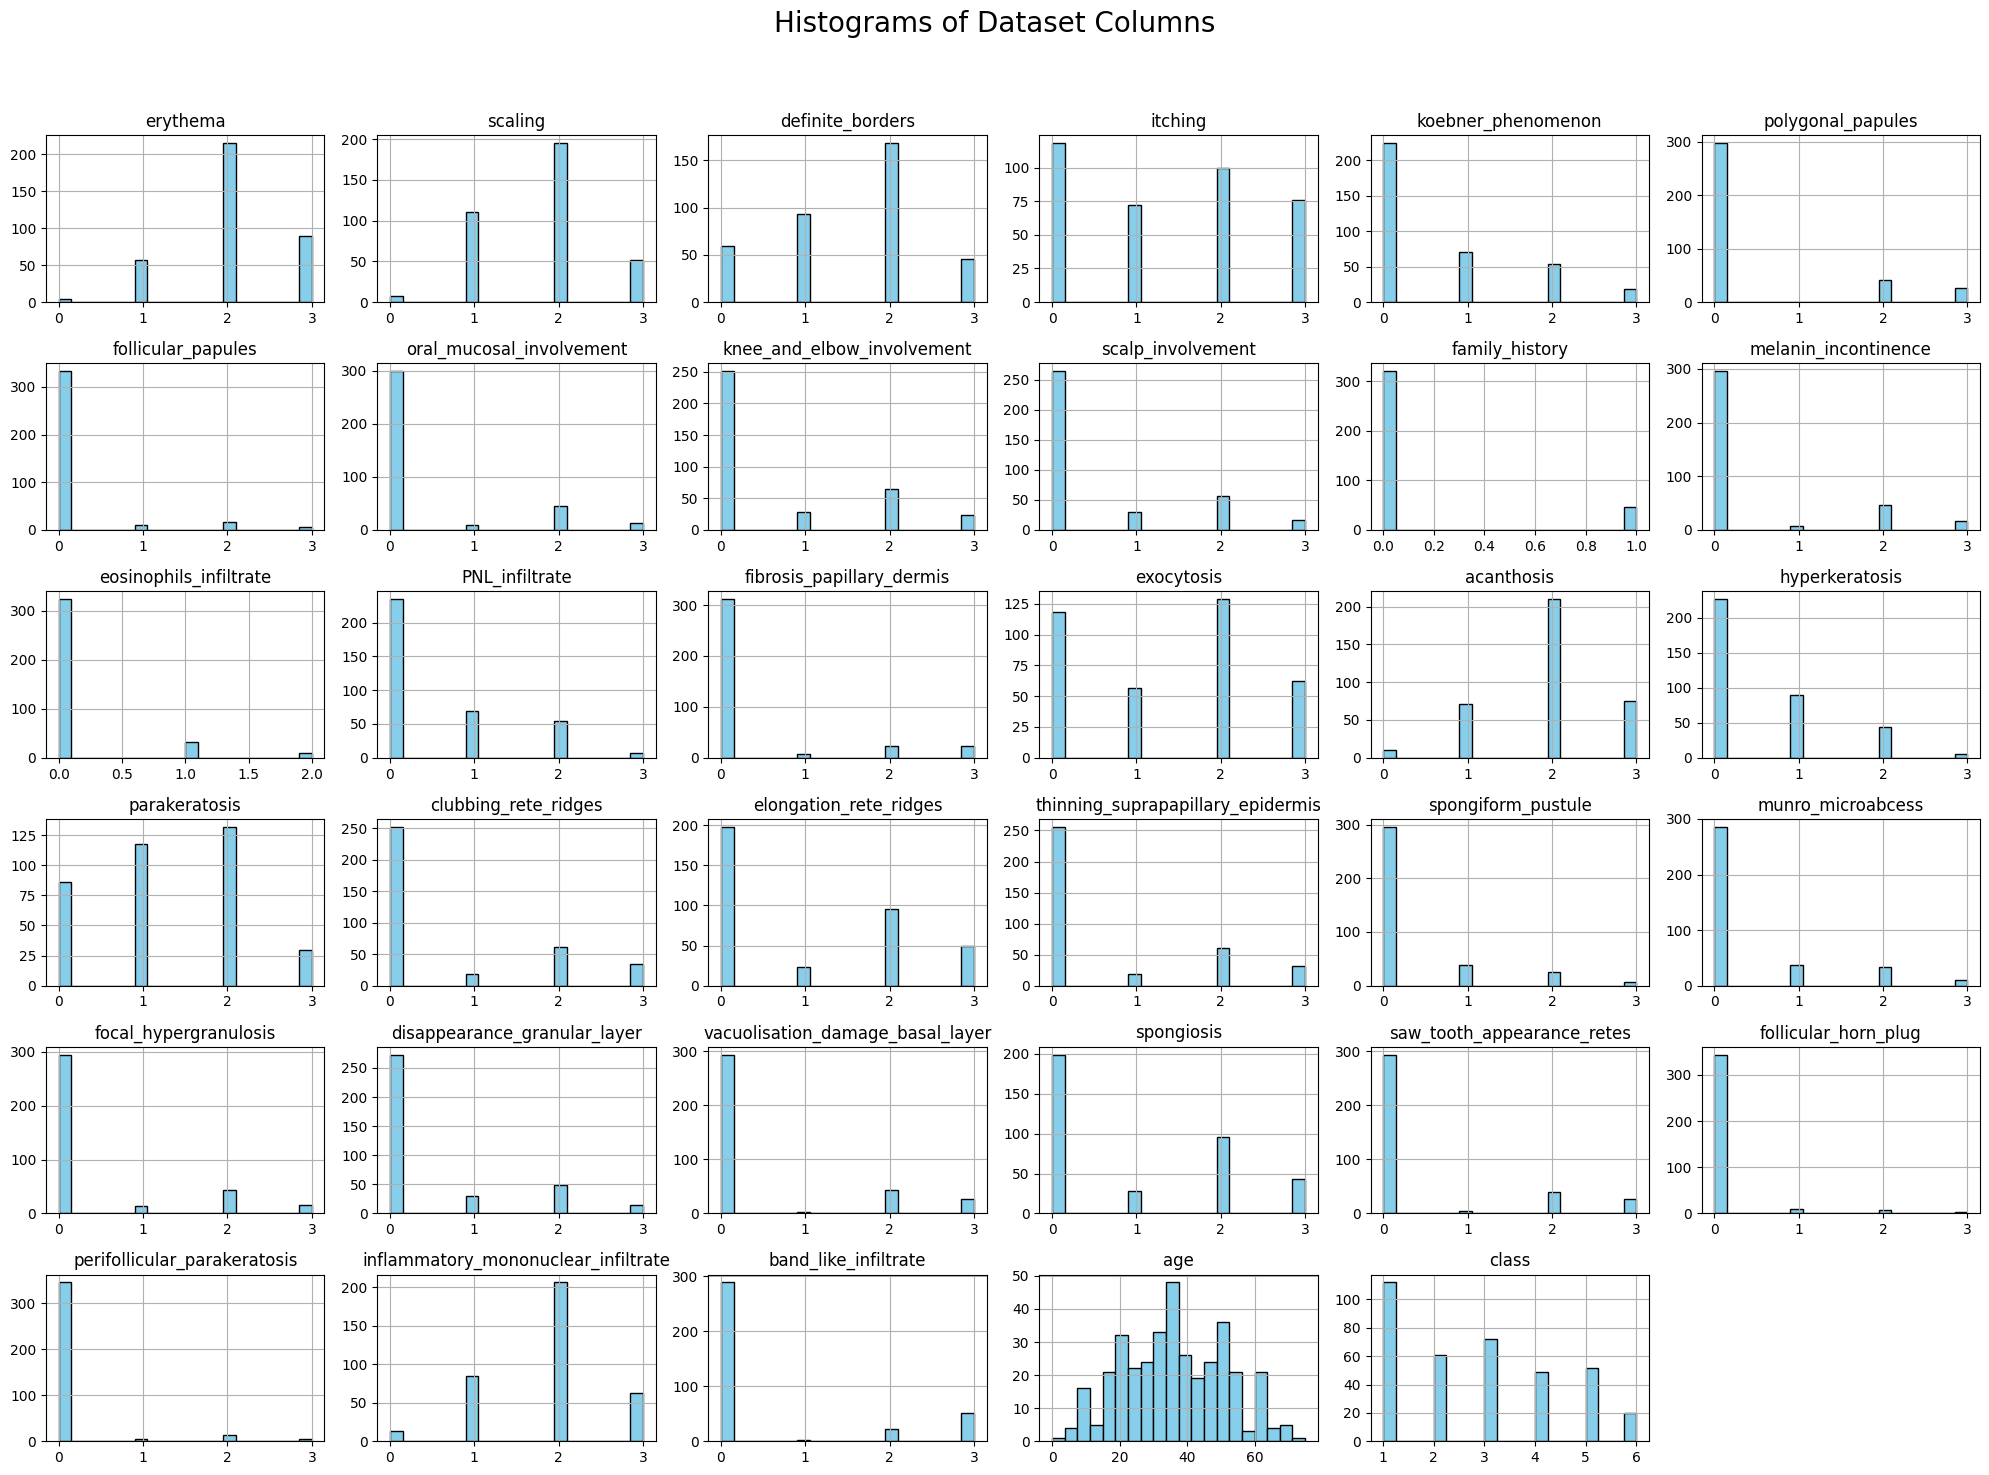

In [12]:
# Plot histograms for each column
data.hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Dataset Columns", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Boxplot

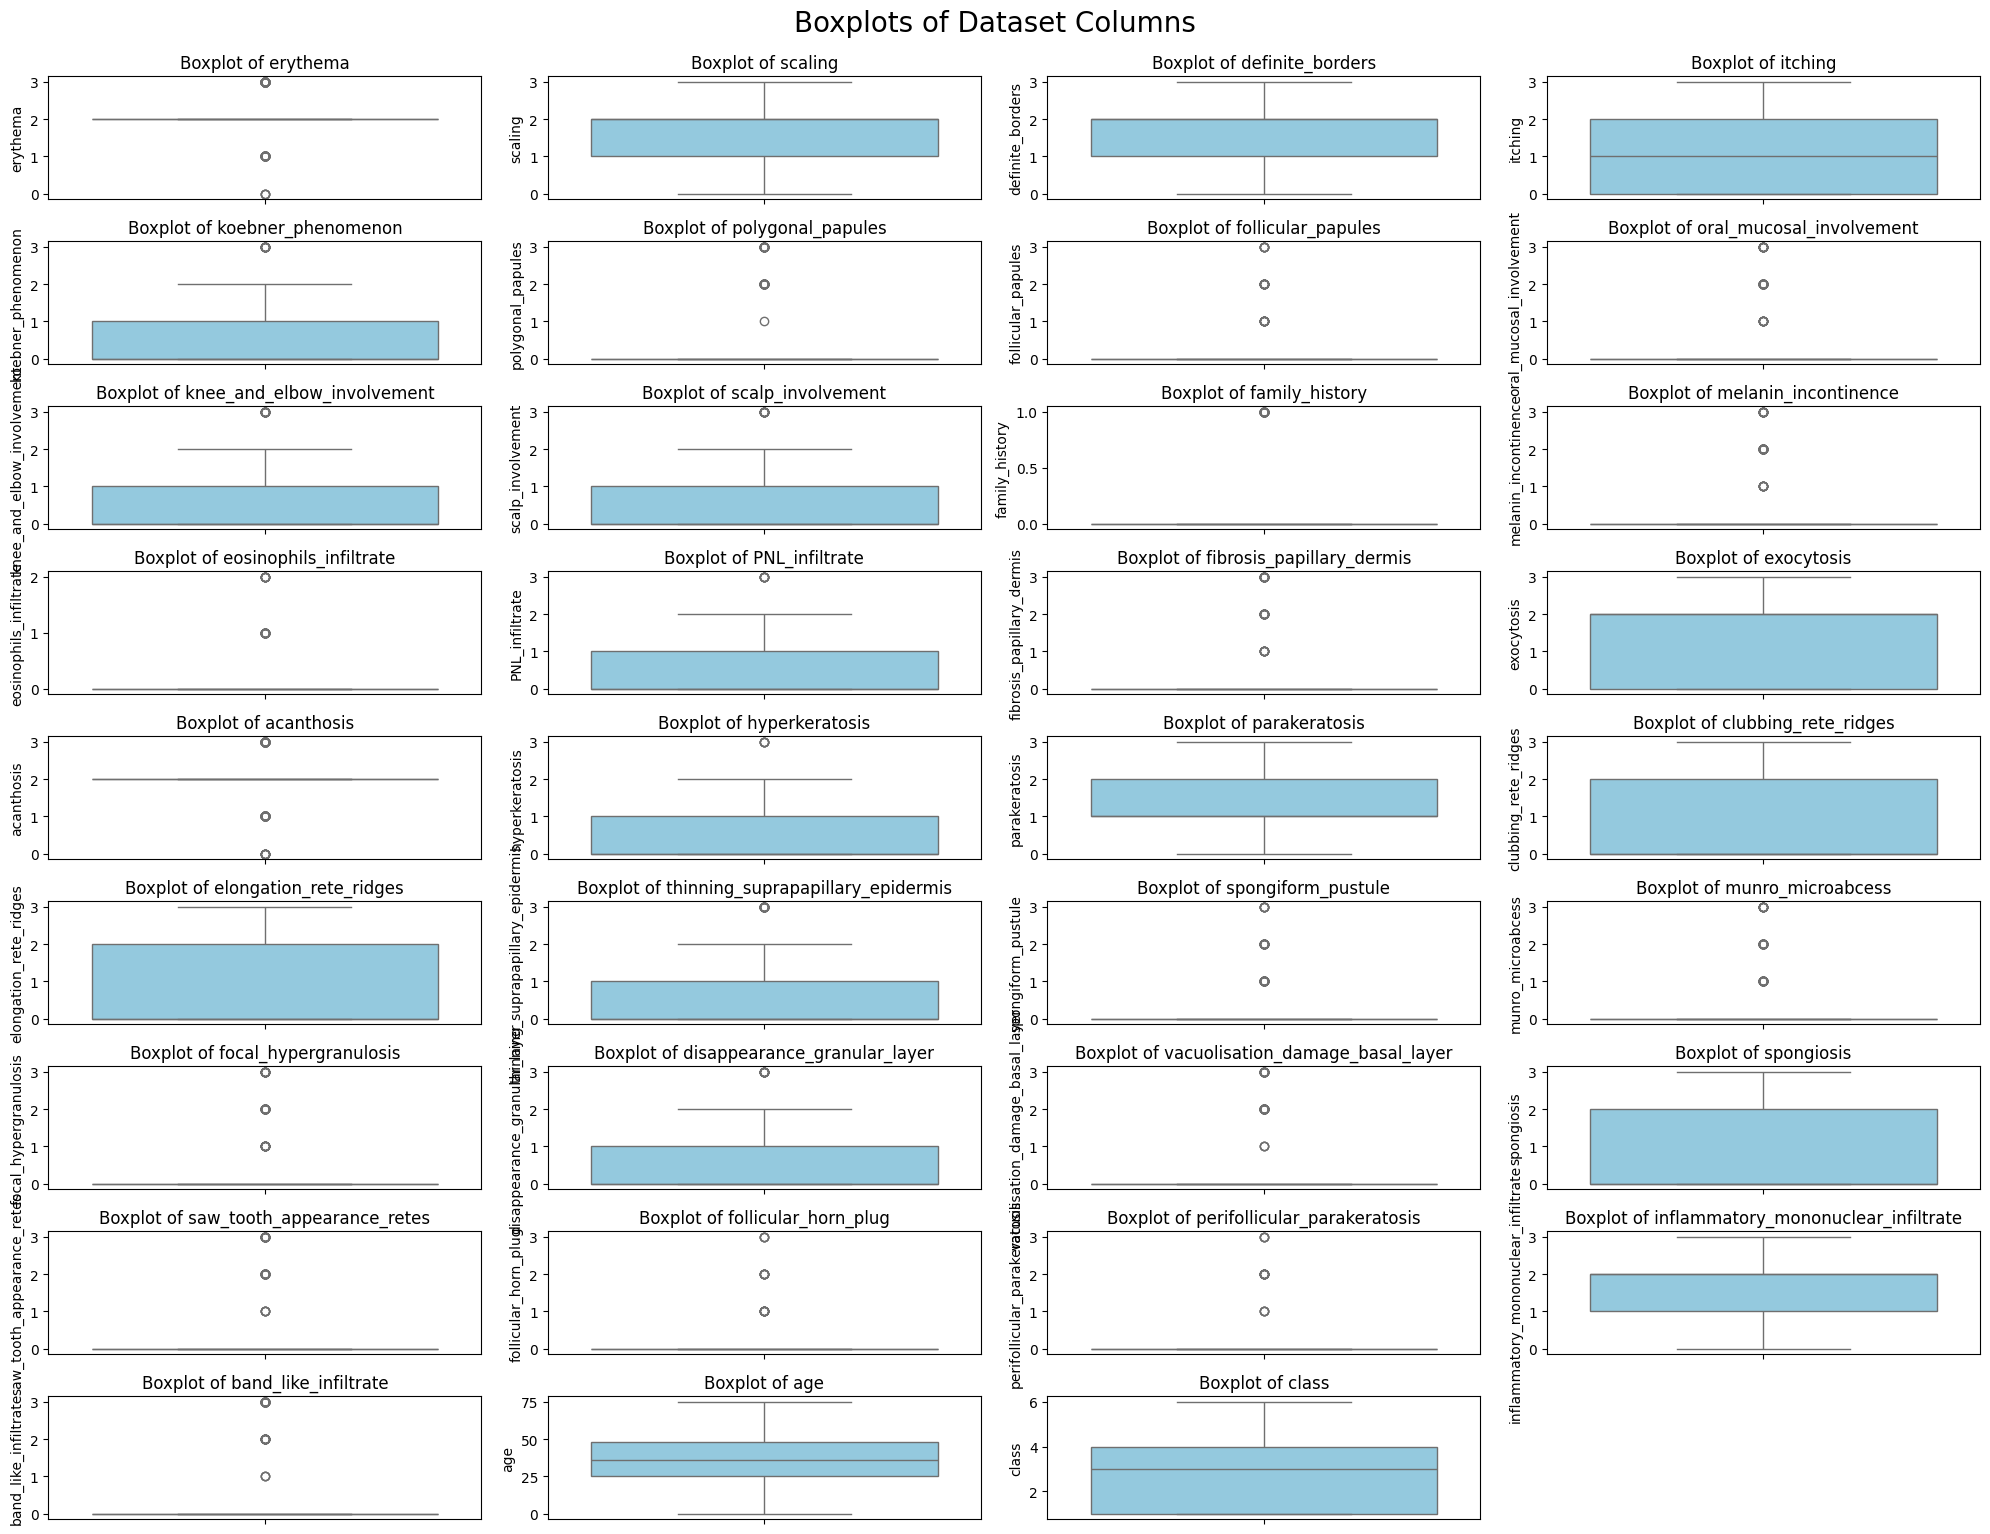

In [13]:
# Plot boxplots for each column
plt.figure(figsize=(20, 15))  # Adjust the figure size
for i, column in enumerate(data.columns, 1):
    plt.subplot((len(data.columns) + 3) // 4, 4, i)  # Arrange subplots in a grid
    sns.boxplot(y=data[column], color='skyblue')
    plt.title(f"Boxplot of {column}")
    plt.xlabel("")
    plt.ylabel(column)

plt.tight_layout()
plt.suptitle("Boxplots of Dataset Columns", fontsize=20, y=1.02)
plt.show()
